## Take Home Assignment

- Author: Kulwinder Kaur
- Date: 1/18/2024

#### In this notebook, I have written a python script to tell us the number of intersections of the chords.

**Provided:**
-  Radian Measurements as list where radians are arranged in ascending order.
-  Identifiers as list with start and end for each chords mentioned.

**Assumptions:**
   1. Identifier is always supplied in the format mentioned in example.
        Example -> ['s1', 's2', 'e1', 'e2']
   2. No intersections will occur at the same point.
   3. Only intersections that happen inside the circle count as intersections, as chords don’t continue outside of the circle.
   4. All strting and ending points are unique. 
   
   
**Additionally, I have also tried to visualize the chords and circle to visualy check if I'm doing it right.**

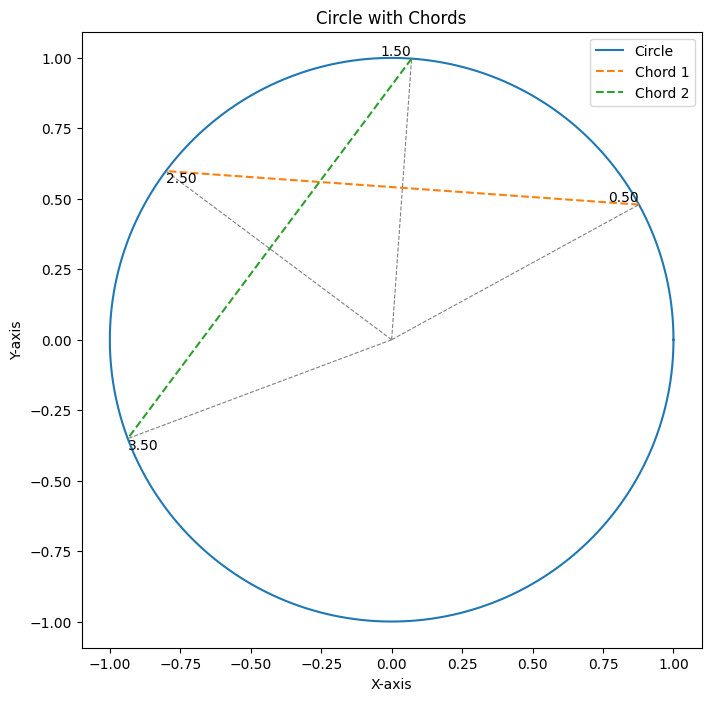

Total Number of Chord Intersections: 1


In [34]:
import numpy as np
import matplotlib.pyplot as plt

def get_chord_pair(radian_measures, identifiers):
    '''
    
    Since it is given that radians will be sorted in ascending order, I believe that there
    will be few cases where identifiers are not ordered. It could also be like ['s1', 's3', 'e3', 'e2', 's2', 'e1']
    To tackle it I created this function.
    
    INPUT 1: List of radian measurement
    INPUT 2: List of identifiers as string writtern in follwoing format
             Example -> ['s1', 's2', 'e1', 'e2']
    
    OUTPUT: List of chord pairs with starting and ending radian measurements are enclosed in tuple
            Example -> [(1.22, 1.33), (0.67, 1.88)]
    
    '''
    
    assert isinstance(radian_measures, list), "Error: radian_measures should be a list"
    assert isinstance(identifiers, list), "Error: identifiers should be a list"
    for item in identifiers:
        assert isinstance(item, str), "Error: identifier item should be a string"
    
    
    start_end_val=[]
    #total number of chords that can be made
    num_chords= int(len(radian_measures)/2)
    #place holder to save chord pair start and end radians as tuple
    chord=[]
    chord_ac=[]
    for identifier in identifiers:
        ids=list(identifier)
        start_end_val.append((ids[0], ids[1]))
   
    for each_chord in range(1, num_chords+1):
        for index, each_identifier in enumerate(start_end_val):
            if each_identifier[0]=='s' and int(each_identifier[1])==each_chord:
                temp1=radian_measures[index]

            elif each_identifier[0]=='e' and int(each_identifier[1])==each_chord:
                temp2=radian_measures[index]

        chord.append((temp1, temp2))
        if temp1<temp2:
            chord_ac.append((temp1, temp2))
        else: 
            chord_ac.append((temp2, temp1))
    # Rearrange the list based on the starting element of each tuple
    sorted_chords = sorted(chord_ac, key=lambda x: x[0])
    
    return chord, sorted_chords

def check_intersection(chord1, chord2):
    '''
    INPUT: Chord1 - tuple(start , end radians)
           Chord2 - tuple(start , end radians)
    OUTPUT : True or False
             True - If chords intersect
             False - If chords do not intersect
    
    '''
    start1, end1 = chord1
    start2, end2 = chord2

    # Calculate angular ranges
    range1 = [start1, end1]
    range2 = [start2, end2]

    if range1[0] <= range2[0] and range1[1] >= range2[0] and range1[1] <= range2[1]:
        return True  # Chords intersect
    else:
        return False  # Chords do not intersect

    
def count_intersections(chords):
    '''
    INPUT : List of Chords. Each chord is a pair of start and end radian values
    OUTPUT : Count of Intersection
    
    '''
    
    intersection_count = 0

    # Iterate over all pairs of chords
    for i in range(len(chords)):
        for j in range(i + 1, len(chords)):
            chord1 = chords[i]
            chord2 = chords[j]

            # Check if chords intersect
            if check_intersection(chord1, chord2):
                intersection_count += 1

    return intersection_count

def visualize(chords):
    num_points = 1000
    theta = np.linspace(0, 2*np.pi, num_points)

    # Plot the circle
    plt.figure(figsize=(8, 8))
    plt.plot(np.cos(theta), np.sin(theta), label='Circle')

    # Plot the chords
    for index, chord in enumerate(chords):
        start_rad, end_rad = chord

        chord_x = [np.cos(start_rad), np.cos(end_rad)]
        chord_y = [np.sin(start_rad), np.sin(end_rad)]

        plt.plot(chord_x, chord_y, label=f'Chord {index+1}', linestyle='--')
        
        #mention radian values
        plt.text(np.cos(start_rad), np.sin(start_rad), f'{start_rad:.2f}', ha='right', va='bottom')
        plt.text(np.cos(end_rad), np.sin(end_rad), f'{end_rad:.2f}', ha='left', va='top')
        
        #draw radian lines from center
        plt.plot([0, np.cos(start_rad)], [0, np.sin(start_rad)], color='gray', linestyle='--', linewidth=0.8)
        plt.plot([0, np.cos(end_rad)], [0, np.sin(end_rad)], color='gray', linestyle='--', linewidth=0.8)

    plt.legend()
    plt.title('Circle with Chords')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axis('equal')  # Ensure equal scaling on both axes
    plt.show()

if __name__=="__main__":
    
    #example input
#     radian_measures = [0.44, 0.78, 1.47, 1.77, 1.99, 3.92, 4.75, 6.00]
#     identifiers = ["s3", "e2", "s2", "e1", "e3", "s4", "e4", "s1"]
#     radian_measures=[1.6, 1.45, 3.0, 3.66]
#     identifiers=['e1', 'e2', 's2', 's1']
#     radian_measures=[0.5, 1.6, 1.9, 2.1]
#     identifiers=['s11', 's2', 'e2', 'e1']
    radian_measures=[0.5, 1.5, 2.5, 3.5]
    identifiers= ["s1", "s2", "e1", "e2"]
    chords, chords_sorted=get_chord_pair(radian_measures, identifiers)
#     count=count_intersections(chords)
    count=count_intersections(chords_sorted)
#     print(chords)
#     print(chords_needed)
    visualize(chords)
    print(f"Total Number of Chord Intersections: {count}")
    